# Kryptografia klasyczna (od starożytności do czasów współczesnych)
### Literatura:
1. Księga szyfrów, Simon Singh, Świat książki, 2001
2. Łamacze kodów, David Kahn, WNT, 2004

## Szyfry Cezara
--------------
Szyfr Cezara oczywiście nie zawdzięcza swego istnienia Juliuszowi Cezarowi. Został przezeń jedynie wspomniany w pamiętnikach JC o wojnach galijskich. Prawdopodobnie była to dobrze znana metoda w tym czasie.

### Szyfr monoalfabetyczny:
_danemu symbolowi alfabetu jawnego odpowiada dokładnie jeden i ten sam symbol alfabetu tajnego._

In [73]:
# Alfabet jawny i szyfrowy
ALPHABETS = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

ALPHABET_SIZE = len(ALPHABETS) # 26

In [74]:
def caesar_encrypt(plaintext: str, key: int):
    """
    plaintext -- tekst do zaszyfrowania
    key -- przesunięcie permutacji czyli klucz szyfrowania
    """
    normalized = plaintext.lower()
    ciphertext = ""
    for char in normalized:
        # szyfruj jedynie znane znaki, zachowaj spacje
        if char in ALPHABETS:
            ciphertext += ALPHABETS[(ALPHABETS.index(char) + key) % ALPHABET_SIZE]
        else:
            ciphertext += char
    return ciphertext

def caesar_decrypt(ciphertext: str, key: int):
    plaintext = ""
    for char in ciphertext:
        if char in ALPHABETS:
            plaintext += ALPHABETS[(ALPHABETS.index(char) - key) % ALPHABET_SIZE]
        else:
            plaintext += char
    return plaintext

plaintext = "Zorro fly zealotry zipper"
ciphertext = ""
key = 15

print("Tekst jawny: ", plaintext)
ciphertext = caesar_encrypt(plaintext, key)
print("Szyfrogram: ",  ciphertext)

decodedtext = caesar_decrypt(ciphertext, key)
print("Odszyfrowana wiadomość: ",  decodedtext)

Tekst jawny:  Zorro fly zealotry zipper
Szyfrogram:  odggd uan otpadign oxeetg
Odszyfrowana wiadomość:  zorro fly zealotry zipper


## Kryptoanaliza szyfrów monoalfabetycznych

Współcześnie kryptoanaliza szyfru Cezara jest trywialna. Można po prostu sprawdzić wszystkie 26 możliwych przesunięć.

Szyfry monoalfabetyczne nie są także odporne na __kryptoanalizę statystyczną__. Znając rozkład częstości liter w tekstach napisanych w danym języku możemy odgadnąć przesunięcie obserwując minima i maxima w histogramach.

W zasadzie kluczową sprawą w obu przypadkach jest znajomość języka, a w gruncie rzeczy alfabetu.

# Problem
1. Narysuj rozkład częstości występowania liter w języku angielskim (kod rysowania histogramu poniżej)

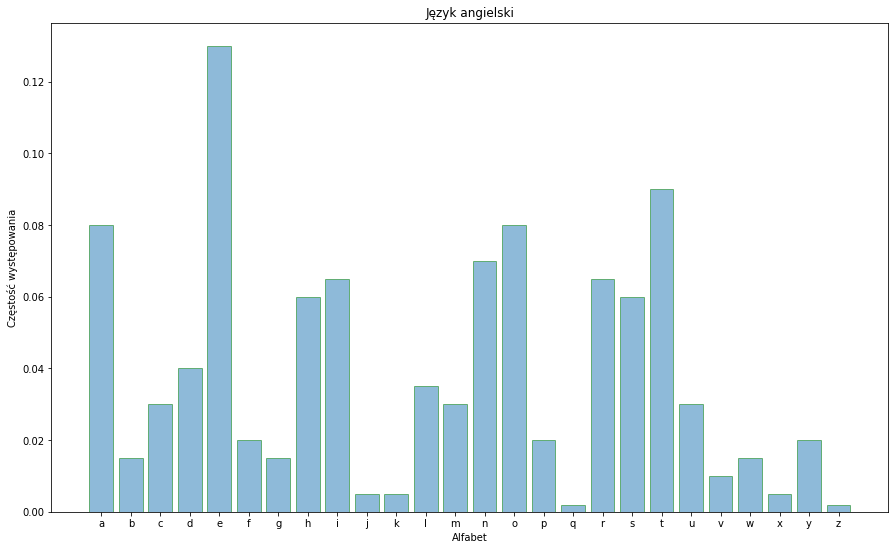

In [75]:
from matplotlib import pyplot as plt
import numpy as np

def plot_frequency(letters, frequency, title, xtitle):
    labels = np.arange(len(letters))
    plt.figure(figsize=(15,9))
    plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
    plt.title(title);
    plt.xlabel(xtitle)
    plt.xticks(np.arange(len(letters)), letters)
    plt.ylabel('Częstość występowania')
    plt.show()

frequency = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 0.030, 0.010, 0.015, 0.005, 0.020, 0.002]
plot_frequency(ALPHABETS, frequency, "Język angielski", "Alfabet")

2. Dokonaj analizy częstości występowania liter w tekście jawnym i szyfrogramie (szyfr Cezara z dowolnym kluczem) dla tekstu w poniższym fragmencie kodu. Wyświetl wyniki podobnie jak powyżej.

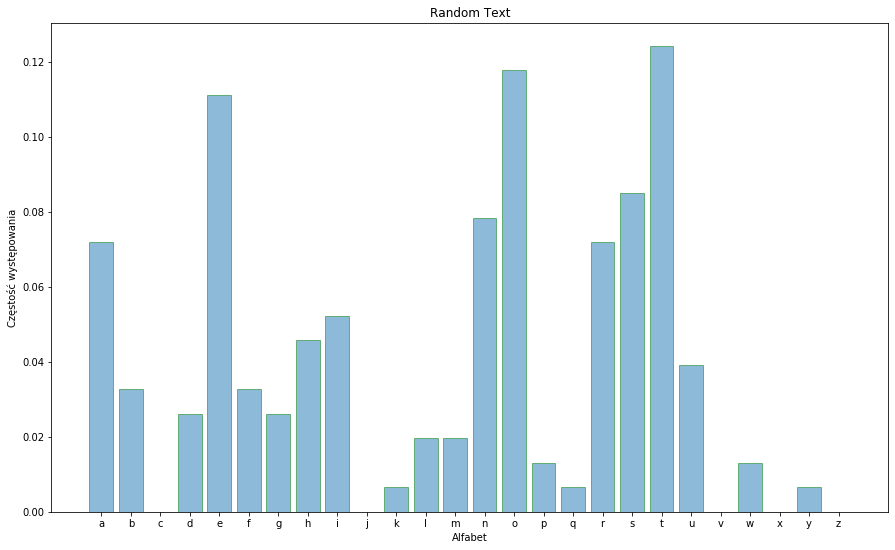

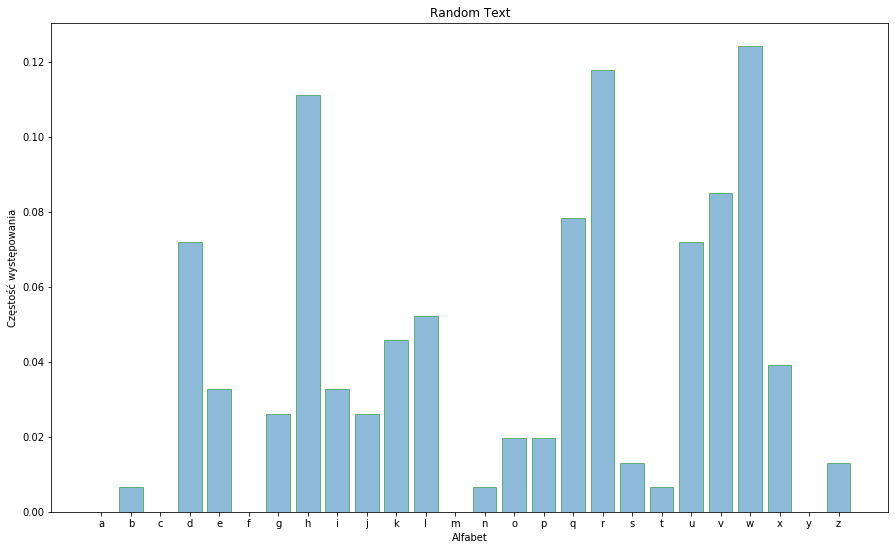

In [76]:
import numpy as np
from matplotlib import pyplot as plt

plaintext = "TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem"

Alphabet = [
    'a','b','c','d','e','f','g','h','i','j','k','l','m',
    'n','o','p','q','r','s','t','u','v','w','x','y','z'
]
ciphertext = caesar_encrypt(plaintext, 3)


# policz częstość i wyświetl rozkłady

# for plaintext
counter = [0] * len(Alphabet)
for char in plaintext.lower():
    for i in range(0, len(Alphabet)):
        if char == Alphabet[i]:
            counter[i] += 1
            break
for i in range(0, len(Alphabet)):
    counter[i] = counter[i] / len(plaintext)
plot_frequency(Alphabet, counter, "Random Text", "Alfabet")


#  for ciphertext
counter = [0] * len(Alphabet)
for char in ciphertext.lower():
    for i in range(0, len(Alphabet)):
        if char == Alphabet[i]:
            counter[i] += 1
            break
for i in range(0, len(Alphabet)):
    counter[i] = counter[i] / len(ciphertext)
plot_frequency(Alphabet, counter, "Random Text", "Alfabet")




#### Przykład zautomatyzowanej kryptoanalizy języka tekstowego.

In [77]:
import nltk
nltk.download('words')
from nltk.corpus import words

ENGLISH_WORDS = words.words()
ENGLISH_FREQUENCY_PROB = {'a': 0.08, 'b': 0.015, 'c': 0.03, 'd': 0.04, 'e': 0.13, 'f': 0.02,
                          'g': 0.015, 'h': 0.06, 'i': 0.065, 'j': 0.005, 'k': 0.005, 'l': 0.035,
                          'm': 0.03, 'n': 0.07, 'o': 0.08, 'p': 0.02, 'q': 0.002, 'r': 0.065,
                          's': 0.06, 't': 0.09, 'u': 0.03, 'v': 0.01, 'w': 0.015, 'x': 0.005,
                          'y': 0.02, 'z': 0.002}


def crack(ciphertext: str):
    only_alphabets = [char for char in ciphertext if char in ALPHABETS] # tylko znane litery
    unique = list(set(only_alphabets)) # lista liter w szyfrogramie

    # częstość liter w tekście
    ciphertext_prob = {c: ciphertext.count(c) / float(len(only_alphabets)) for c in unique}

    psi = {k: 0.0 for k in range(0, 26)} # mapowanie z potencjalnego klucza na jego stopień dopasowania
    for key_attempt in range(0, 26): #oblicz dopasowanie
        for unique_char in unique:
            maybe_decoded_letter = caesar_decrypt(unique_char, key_attempt)
            psi[key_attempt] += ciphertext_prob[unique_char] * ENGLISH_FREQUENCY_PROB[maybe_decoded_letter]

    # sortuj od najlepszego dopasowania
    sorted_psi = sorted(psi.items(), key=lambda key_match: key_match[1], reverse=True)

    for key, _ in sorted_psi:
        decoded_string = caesar_decrypt(ciphertext, key)

        print("Próba klucza: ", key, " ....", decoded_string)

        decoded_words = decoded_string.split()
        # czy szyfrowanie ma sens
        if any(decoded_word in ENGLISH_WORDS for decoded_word in decoded_words):
            print("\n", "Odszyfrowany tekst: ", decoded_string)
            return decoded_string
    else:
        print("\n", "Żaden klucz nie przyniósł znanego słowa")
        return None

ciphertext = "oxeetg uaxvwi" # zakomentuj tę linię bo używać szyfrogramu z poprzedniego zadania

print("Szyfrogram:", ciphertext)
crack(ciphertext)

Szyfrogram: oxeetg uaxvwi
Próba klucza:  4  .... ktaapc qwtrse
Próba klucza:  0  .... oxeetg uaxvwi
Próba klucza:  19  .... vellan bhecdp
Próba klucza:  15  .... zipper flight

 Odszyfrowany tekst:  zipper flight


[nltk_data] Downloading package words to /home/jasiek/nltk_data...
[nltk_data]   Package words is already up-to-date!


'zipper flight'

## Podsumowanie
Główną słabością szyfrów monoalfabetycznych jest stałość przekształcenia, dzięki czemu możliwe jest łatwe zaobserwowanie regularności.

Rozwiązaniem może być zmiana alfabetów w trakcie szyfrowania. Dla uproszczenia wystarczy zmieniać jedynie porządek liter.

# Problem
1. Napisać program, który zmienia alfabet szyfrowania po każdej literze.
_Co będzie potrzebne oprócz tekst jawnego?_


In [87]:
del plaintext
def changing_alphabet(plaintext: str, key: str): # w razie potrzeby dodaj inne argumenty
    plaintext = plaintext.lower()

    key = key.lower()
    ciphertext = [char] * len(plaintext)
    for i in range(0, len(plaintext)):

        ciphertext[i] = caesar_encrypt(plaintext[i], Alphabet.index(key[i % len(key)]))

    """
    Napisz swój kod tutaj
    """

    return ciphertext



plaintext = "Kryptografia"
key = "Key"


changing_alphabet(plaintext, key)

['u', 'v', 'w', 'z', 'x', 'm', 'q', 'v', 'y', 'p', 'm', 'y']

### Zastanów się:
1. Sprawdź jak wygląda histogram szyfrogrami.
2. Zastanów się jakie znaczenia ma długość klucza dla bezpieczeństwa szyfrowania.
3. Czy powtarzanie klucza można wykorzystać dla potrzeb kryptoanalizy?
4. Jaki klucz gwarantowałby bezpieczeństwo?
5. Jaki rozkład częstości symboli szyfrogramu nie ujawni żadnych przydatnych danych kryptoanalitykowi?

### Szyfr polialfabetyczny
_Szyfr używający wielu alfabetów szyfrowych. W trakcie szyfrowania te same litery w tekście jawnym_

### Szyfr doskonały (według Clouda Shannona):
1. Jakie warunki musi spełniać szyfr-nie-do-złamania?

***
# Szyfrowanie strumieniowe

Szyfrowanie strumieniowe polega na zastępowaniu litery tekstu jawnego przez literę szyfrogrami, znak po znaku, bit/bajt po bitcie/bajcie.
1. Poszukaj informacji o szyfrowaniu Vernama. Wypróbuj i przeanalizuj poniższy kod.

In [ ]:

import random, datetime

baudot = {
  'A': "10000",
  'B': "00110",
  'C': "10110",
  'D': "11110",
  'E': "01000",
  '\'': "11000",
  'F': "01110",
  'G': "01010",
  'H': "11010",
  'I': "01100",
  'J': "10010",
  'K': "10011",
  'L': "11011",
  'M': "01011",
  'N': "01111",
  'O': "11100",
  'P': "11111",
  'Q': "10111",
  'R': "00111",
  'S': "00101",
  'T': "10101",
  'U': "10100",
  'V': "11101",
  'W': "01101",
  'X': "01001",
  'Y': "00100",
  'Z': "11001",
  '*': "00011",
  ',': "10001",
  '.': "00010",
  '_': "00001",
  '/': "00000"
}

reverseBaudot = {v:k for k, v in baudot.items()}

def vernam(plaintext):
  plaintext = plaintext.upper()
  plaintext = plaintext.replace(' ', '_')
  key = ""
  for i in plaintext:
    random.seed(datetime.datetime.now())
    key += chr(65 + random.choice(range(0, 25)))
  print("Key   :\t", key)
  return encrypt(plaintext, key)


def encrypt(plaintext, key):
  plaincode = getBaudot(plaintext.upper())
  keycode = getBaudot(key)
  xor = int(plaincode, 2) ^ int(keycode, 2)
  return getText(bin(xor)[2:].zfill(len(plaincode)))

def getBaudot(text):
  ret = ""
  for c in text:
    ret += baudot[c]
  return ret

def getText(baudotCode):
  splitBaudot = [baudotCode[i:i+5] for i in range(0, len(baudotCode), 5)]
  ret = ""
  for i in splitBaudot:
    ret += reverseBaudot[i]
  return ret

message = "TEST"
key = "KEYS"
encrypted= encrypt(message, key)
print(encrypted)
decrypted = encrypt(encrypted, key)
print(decrypted)

## Problem
1. Jak można skonstruować najprostszy algorytm szyfrowania strumieniowego?
1. Napisz prosty program szyfrujący (z kluczem) ciąg znaków z użyciem operatora logicznego. Jaki operator będzie najwygodniejszy? Jak będziesz używał klucza?


In [ ]:
# napisz program
import random

def randomBytes(n):
    return bytes(random.getrandbits(8) for i in range(n))



### Bezpieczeństwo szyfru XOR
1. Utwórz dwie wiadomości równej długości. Zaszyfruj je szyfrem XOR z użyciem tego samego klucza. Wyznacz alternatywę rozłączną szyfrogramów i porównaj ją z tą samą operacją wykonaną dla tekstów jawnych. Jakie znaczenie ma wynik z punktu widzenia kryptoanalizy.

In [ ]:
message1 = ' '
message2 = ' '

### Zastanów się:
1. Poszukaj informacji o szyfrach binarnie addytywnych
2. Jakie znaczenie ma klucz w szyfrach tego typu?
3. Co się dzieje gdy klucz jest ,,nielosowy''?
4. W jaki sposób wygenerować strumień pseudolosowy zależny od klucza?
5. Czy szyfr strumieniowy jak powyżej jest bezpieczny? Czy może być stosowany w praktyce? Jakie widzisz problemy z jego użytkowaniem?

## Jak sprawdzić losowość ciągu?

Testy losowości NIST https://csrc.nist.gov/publications/detail/sp/800-22/rev-1a/final

Proszę zbadać losować różnych ciągów bitów, także generowanych przez generator liczb pseudolosowych.

In [ ]:
'''
Przykładowy test monobit
'''
import numpy
import math
from scipy import special as spc

def monobit(bin_data: str):
    """
    Note that this description is taken from the NIST documentation [1]
    [1] http://csrc.nist.gov/publications/nistpubs/800-22-rev1a/SP800-22rev1a.pdf

    The focus of this test is the proportion of zeros and ones for the entire sequence. The purpose of this test is
    to determine whether the number of ones and zeros in a sequence are approximately the same as would be expected
    for a truly random sequence. This test assesses the closeness of the fraction of ones to 1/2, that is the number
    of ones and zeros ina  sequence should be about the same. All subsequent tests depend on this test.

    :param bin_data: a binary string
    :return: the p-value from the test
    """
    count = 0
    # If the char is 0 minus 1, else add 1
    for char in bin_data:
        if char == '0':
            count -= 1
        else:
            count += 1
    # Calculate the p value
    sobs = count / math.sqrt(len(bin_data))
    p_val = spc.erfc(math.fabs(sobs) / math.sqrt(2))
    return p_val


#Generowanie n-bitowego ciągu
n=3
#arr = numpy.random.randint(2, size=(n,))
bitString = []
for i in range(0, 1024):
    x = str(numpy.random.randint(0, 2))
    bitString.append(x)
arr = ''.join(bitString)
print(arr)
print(monobit(arr))

Cumulative Sums Test (2.13 w dokumentacji NIST) bada losowość sekwencji bitów na podstawie sum prefiksowych (tryb 0) lub sum sufiksowych (tryb 1), biorąc największą na moduł sumę i obliczając wartość P-value na podstawie sum wartości dystrybuanty rozkładu normalnego. Jeżeli zwrócona wartość P-value jest < 0.01, to przyjmuje się, że sekwencja bitów nie jest losowa.

In [ ]:
import math as math
import numpy as np
import random
from numpy import abs as abs
from numpy import array as array
from numpy import floor as floor
from numpy import max as max
from numpy import sqrt as sqrt
from numpy import sum as sum
from numpy import zeros as zeros
from scipy.stats import norm as norm

def random_bits(n):
    return '{0:b}'.format(random.getrandbits(n))

def half_random_bits(n):
    result = []
    result += random_bits(n/2)
    for i in range(int(n/2)):
        result += ['1']
    return result

# 2.13 Cumulative Sums (Cusum) Test
# https://nvlpubs.nist.gov/nistpubs/Legacy/SP/nistspecialpublication800-22r1a.pdf
# The focus of this test is the maximal excursion (from zero) of the random walk defined by the cumulative
# sum of adjusted (-1, +1) digits in the sequence. The purpose of the test is to determine whether the
# cumulative sum of the partial sequences occurring in the tested sequence is too large or too small relative
# to the expected behavior of that cumulative sum for random sequences. This cumulative sum may be
# considered as a random walk. For a random sequence, the excursions of the random walk should be near
# zero. For certain types of non-random sequences, the excursions of this random walk from zero will be
# large.

def cumulative_sums_test(bits_stream, mode='FORWARD'):
    n = len(bits_stream)

    if mode=='BACKWARD':
        bits_stream = bits_stream[::-1]

    S = np.zeros(n)
    S[0] = 1 if bits_stream[0] == '1' else -1
    for i in range(1, n):
        bit_char = bits_stream[i]
        if bit_char == '1':
            S[i] = S[i-1] + 1
        if bit_char == '0':
            S[i] = S[i-1] - 1

    # z = max1 ≤ k ≤ n|Sk|, where max1 ≤ k ≤n|Sk|
    z = max(abs(S))

    k_0 = int(floor(0.25 * floor(-n / z) + 1))
    k_n = int(floor(0.25 * floor(n / z) - 1))
    phis_1 = []
    for k in range(k_0, k_n + 1):
        s = norm.cdf((4 * k - 1) * z / sqrt(n))
        phis_1.append(norm.cdf((4 * k + 1) * z / sqrt(n)) - s)

    k_0 = int(floor(0.25 * floor(-n / z - 3)))
    k_n = int(floor(0.25 * floor(n / z) - 1))
    phis_2 = []
    for k in range(k_0, k_n + 1):
        s = norm.cdf((4 * k + 1) * z / sqrt(n))
        phis_2.append(norm.cdf((4 * k + 3) * z / sqrt(n)) - s)

    P = 1.0 - sum(array(phis_1)) + sum(array(phis_2))
    return P >= 0.01, P



bits = random_bits(100)
res = cumulative_sums_test(bits)
print(res)